## 7.1 线性可分支持向量机与硬间隔最大化

输入空间和特征空间是两个不同的空间。

线性可分支持向量机和线性支持向量机的假设是两个空间一一对应，

非线性支持向量机以一个从输入空间到特征空间的非线性映射将两个空间作嵌入。

支持向量机的学习是在特征空间进行的。

函数间隔：y\*（w*x+b）

几何间隔：对w规范化

支持向量机的学习目标是求解正确划分训练集且几何间隔最大化的超平面（硬间隔最大化）。

可以等价转化为约束凸二次规划问题

最大间隔分离超平面若存在必是唯一的

支持向量与间隔边界

学习的对偶算法



## 7.2 线性支持向量机与软间隔最大化

线性不可分时，即函数间隔不能满足同时大于等于1，

此时，通过引入松弛变量，减弱约束条件，允许一些样本误分类

## 7.3 非线性支持向量机与核函数

In [2]:
from sklearn.svm import SVC
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.array([[1,2],[2,3],[3,3],[2,1],[3,2]])
y = np.array([1,1,1,-1,-1])

In [4]:
clf = SVC(C=10,kernel='linear')
clf.fit(X,y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [5]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    plt.xlim(0,3.5)
    plt.ylim(0,3.5)
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([[xi, yj]]))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


In [6]:
clf.coef_,clf.intercept_

(array([[-1.,  2.]]), array([-2.]))

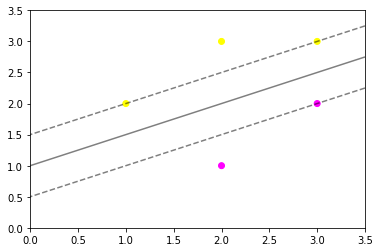

In [7]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='spring')
plot_svc_decision_function(clf)